In [ ]:
#see https://github.com/scikit-learn/scikit-learn/blob/42aff4e2e/sklearn/datasets/_samples_generator.py#L479

In [3]:
import generate 
import propagate

In [4]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pylab as plt

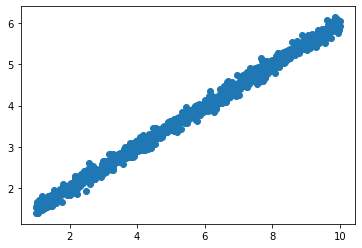

In [44]:
SLR = generate.SLR()

X = SLR.random_sampling(m_samples=1000)
Y = SLR.random_treatment(X, m_samples=1000) 

plt.scatter(X,Y)

In [45]:
import statsmodels.api as sm

In [47]:
S_X = sm.add_constant(X[0])

In [48]:
model = sm.OLS(Y[0], S_X)

In [49]:
results = model.fit()

In [50]:
results.params

array([1.00347172, 0.49887597])

In [51]:
affine = propagate.affine_function()
loss = propagate.loss_function()
cost = propagate.cost_function()

In [55]:
n_features = 1
m_samples = 1000

weight = np.random.randn(n_features,1)
bias = np.random.randn(1)
lr = 0.001

weight, bias

(array([[1.69790108]]), array([-1.08058954]))

In [58]:
for _ in range(10000):
    x, y = X, Y
    y_hat = affine.forward(weight, bias, x)
#     print(y_hat)
    L = loss.forward(y, y_hat)
#     print(L)
    J = cost.forward(L)
# #     print(J)

    dL = cost.backward(sample_size = m_samples, dvoi=1)
#     print(dL)
    dy_hat = loss.backward(dL)
#     print(dy_hat)
    dw, db = affine.backward(dy_hat)

    dw, db = np.sum(dw), np.sum(db)
#     print(dw,db)

    weight -= lr*dw 
    bias -= lr*db
#     print(weight,bias)

In [59]:
print(weight,bias)

[[0.50500991]] [0.96277707]


In [24]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[5.43177657 1.88093559 3.19923082 4.5588484  4.0181545  6.22003117
  5.29909382 2.39203243 4.13424394 5.93880747 3.89698878 4.93222539
  6.39409031 3.66343864 5.26763586 7.0367658  5.04619914 2.304829
  4.32757073 3.92608812 5.30708059 3.68816704 6.24436747 5.3961992
  1.71150745]]
[[8.54534598e-01 4.20617535e-04 1.55242281e-01 2.38316473e-01
  4.93082891e-01 5.52064672e-01 8.75803540e-01 1.83758728e-01
  3.55681717e-01 6.73643937e-01 5.07438259e-01 3.33731255e-01
  1.17448759e+00 2.75120586e-01 4.15933299e-01 7.45396111e-01
  5.42160965e-01 1.93097857e-01 4.39383274e-01 2.84692300e-01
  8.46161365e-01 1.85752907e-01 7.69064962e-01 6.10553630e-01
  7.12315736e-02]]
0.4710702155438193
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.07395283 -0.00164072  0.03152064  0.03905413  0.05617589  0.05944084
   0.0748675   0.03429367  0.04771125  0.06566065  0.05698776  0.04621558
   0.08669902  0.04196155  

In [25]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[5.37008189 1.86888095 3.16874668 4.50935709 3.97622198 6.14731686
  5.23925402 2.37283276 4.09068851 5.87002461 3.85675013 4.87751434
  6.31894268 3.62646497 5.20823584 6.9526337  4.98989476 2.28684841
  4.28131263 3.88544266 5.24712914 3.65084767 6.17131294 5.33500189
  1.70182138]]
[[0.74427843 0.00106039 0.13214958 0.19244485 0.4359513  0.44929704
  0.76738294 0.16766668 0.30562669 0.56546683 0.45172964 0.27351198
  1.01725411 0.23770082 0.34284408 0.6072012  0.46241554 0.17761878
  0.3801978  0.24297031 0.73946042 0.15497705 0.64626962 0.51866212
  0.06615512]]
0.4032117320846424
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.06901726 -0.00260509  0.02908191  0.03509483  0.05282129  0.0536237
   0.07008032  0.0327577   0.04422681  0.06015802  0.05376867  0.0418387
   0.08068721  0.03900366  0.04684231  0.06233849  0.05440091  0.03371587
   0.04932815  0.03943362  0.06879351  0.0314937   0.064

In [26]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[5.31318552 1.85776143 3.14063192 4.46371436 3.93754979 6.08025844
  5.18406817 2.35512426 4.05051972 5.80659168 3.81963999 4.8270581
  6.24964032 3.59236571 5.15345555 6.87504608 4.93796919 2.27026413
  4.2386515  3.84795738 5.19184033 3.61642963 6.10394078 5.27856418
  1.6928861 ]]
[[0.64934484 0.00190822 0.11249924 0.15448252 0.38637897 0.36389586
  0.67374238 0.15347803 0.26282678 0.47409058 0.40322273 0.22328223
  0.88226158 0.20561369 0.28169407 0.49230365 0.39449184 0.16391498
  0.32940791 0.20742095 0.6474295  0.12906286 0.54248646 0.44055648
  0.06163853]]
0.3454973946264869
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.06446555 -0.00349465  0.02683273  0.03144341  0.04972751  0.04825903
   0.06566545  0.03134102  0.04101331  0.05508339  0.05079986  0.0378022
   0.07514302  0.03627572  0.04245989  0.05613148  0.05024687  0.03238913
   0.04591525  0.03643479  0.0643704   0.02874026  0.058

In [27]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[5.26071429 1.84750431 3.11470227 4.42162092 3.90188438 6.01841606
  5.13317434 2.33879097 4.01347418 5.74809262 3.78541505 4.78052578
  6.18572864 3.56091734 5.1029357  6.80349396 4.89008188 2.25496756
  4.1993076  3.81338649 5.14085154 3.58468727 6.04180908 5.22651591
  1.68464322]]
[[0.5675334  0.00290955 0.09577751 0.12316534 0.34331219 0.29310901
  0.5927834  0.14094726 0.22621515 0.39695455 0.36092853 0.18147188
  0.76628335 0.17808238 0.23061965 0.39701519 0.33663036 0.1517629
  0.28579372 0.17712653 0.56797513 0.10726335 0.45482223 0.37417202
  0.05761354]]
0.2964107247501848
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.06026785 -0.00431522  0.02475835  0.02807594  0.04687428  0.04331163
   0.06159394  0.03003435  0.03804966  0.05040346  0.04806186  0.03407961
   0.07003009  0.03375985  0.0384183   0.05040731  0.04641588  0.03116541
   0.04276774  0.03366912  0.0602913   0.02620087  0.05

In [32]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.7521809  1.74774382 2.8631796  4.01357904 3.55608719 5.41913878
  4.63991539 2.18019301 3.65431278 5.18118982 3.45356647 4.32950073
  5.56641367 3.25595505 4.61329819 6.11019417 4.42593618 2.10640845
  3.81789041 3.478188   4.64667316 3.27687825 5.4397302  4.72207819
  1.60438731]]
[[5.99342560e-02 2.36239140e-02 3.35898515e-03 3.25957399e-03
  5.76630429e-02 3.35030841e-03 7.65437054e-02 4.70158852e-02
  1.35627933e-02 3.98672204e-03 7.23204923e-02 6.26495235e-04
  6.55673113e-02 1.36973793e-02 8.85248296e-05 3.99529892e-03
  1.34682630e-02 5.80850825e-02 2.34639896e-02 7.33858254e-03
  6.73209782e-02 3.88161643e-04 5.23108230e-03 1.15043418e-02
  2.55271869e-02]]
0.02643689427337154
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.01958518 -0.01229606  0.00463654 -0.00456741  0.0192105  -0.00463055
   0.02213323  0.01734652  0.00931675  0.00505124  0.02151398 -0.00200239
   0.02048489  0.009362

In [33]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.7433453  1.74599079 2.85879708 4.0064846  3.55007123 5.40873091
  4.63134444 2.17742054 3.64806526 5.17134288 3.44779219 4.32166154
  5.55565862 3.25064661 4.60478998 6.09815722 4.41786965 2.10380992
  3.81125728 3.47235567 4.63808628 3.27152048 5.42927379 4.71331355
  1.60297223]]
[[0.05568615 0.02416587 0.0028702  0.00411999 0.05480999 0.00466349
  0.0718746  0.04582125 0.01214666 0.0028402  0.06924814 0.00108038
  0.06017508 0.012483   0.00032102 0.00566186 0.01166105 0.0568393
  0.02147587 0.00637334 0.06293876 0.00020575 0.00382787 0.009701
  0.02507701]]
0.02504271246411484
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.01887833 -0.0124363   0.00428594 -0.00513497  0.01872923 -0.00546318
   0.02144755  0.01712472  0.00881695  0.00426348  0.02105203 -0.00262953
   0.01962449  0.00893819 -0.00143336 -0.00601963  0.00863891  0.01907279
   0.01172372  0.00638666  0.02007008  0.00114752  0.004

In [34]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.73519711 1.74437174 2.854754   3.99994152 3.54452235 5.39913331
  4.62344022 2.1748617  3.64230292 5.16226239 3.4424661  4.31443191
  5.54574097 3.24574997 4.59694362 6.08705785 4.41043045 2.10141143
  3.80513946 3.46697608 4.63016738 3.26657837 5.41963145 4.70523078
  1.60166471]]
[[5.19069423e-02 2.46718671e-02 2.45333502e-03 5.00276181e-03
  5.22426271e-02 6.06643332e-03 6.76989230e-02 4.47323183e-02
  1.09097083e-02 1.95479534e-03 6.64733839e-02 1.60790626e-03
  5.54077227e-02 1.14128028e-02 6.63749555e-04 7.45540559e-03
  1.01097238e-02 5.57014034e-02 1.97202052e-02 5.54333999e-03
  5.90281449e-02 8.83965067e-05 2.72770844e-03 8.17412885e-03
  2.46646080e-02]]
0.023856733652809804
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.01822648 -0.01256582  0.00396249 -0.00565842  0.01828532 -0.00623098
   0.02081521  0.01692001  0.00835596  0.00353705  0.02062595 -0.0032079
   0.01883108  0.008546

In [35]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.72768289 1.74287625 2.85102398 3.99390692 3.53940424 5.39028299
  4.6161509  2.17249989 3.63698803 5.15388874 3.43755337 4.30776443
  5.53659561 3.24123311 4.58970761 6.07682315 4.40356979 2.09919743
  3.79949688 3.46201402 4.62286451 3.26201959 5.41073987 4.69777686
  1.6004564 ]]
[[4.85394600e-02 2.51439065e-02 2.09774324e-03 5.89283486e-03
  4.99291641e-02 7.52341823e-03 6.39588357e-02 4.37388496e-02
  9.82768132e-03 1.28446385e-03 6.39642734e-02 2.18707598e-03
  5.11859354e-02 1.04681251e-02 1.08895651e-03 9.32757992e-03
  8.77715225e-03 5.46612465e-02 1.81672845e-02 4.82907556e-03
  5.55329120e-02 2.34562205e-05 1.87799930e-03 6.88185863e-03
  2.42865384e-02]]
0.022847833081394174
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.01762534 -0.01268546  0.00366409 -0.00614118  0.01787587 -0.00693901
   0.02023207  0.01673107  0.00793077  0.00286715  0.02023293 -0.00374129
   0.01809945  0.00818

In [36]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.72075332 1.7414947  2.84758266 3.98834126 3.53468339 5.38212181
  4.60942864 2.17031978 3.6320858  5.14616696 3.43302183 4.30161539
  5.52816247 3.23706648 4.58303451 6.06738586 4.39724267 2.09715357
  3.79429258 3.45743702 4.61612978 3.25781433 5.40254067 4.69090288
  1.59933958]]
[[4.55340788e-02 2.55839536e-02 1.79435326e-03 6.77830493e-03
  4.78417181e-02 9.00578619e-03 6.06038947e-02 4.28317133e-02
  8.87975046e-03 7.90601454e-04 6.16926530e-02 2.80002134e-03
  4.74411740e-02 9.63287926e-03 1.57390314e-03 1.12395381e-02
  7.63165336e-03 5.37097260e-02 1.67914353e-02 4.21389873e-03
  5.24041300e-02 4.06918970e-07 1.23458659e-03 5.78862094e-03
  2.39396917e-02]]
0.021989538924359772
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 1.70709726e-02 -1.27959878e-02  3.38878457e-03 -6.58643694e-03
   1.74981998e-02 -7.59190566e-03  1.96942866e-02  1.65566592e-02
   7.53859423e-03  2.24941088e-03  1.9

In [37]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.71436294 1.74021825 2.84440759 3.98320807 3.53032891 5.37459618
  4.60322935 2.16830724 3.62756412 5.13904635 3.42884185 4.29594446
  5.52038616 3.23322286 4.57688052 6.05868396 4.39140759 2.09526662
  3.78949248 3.45321513 4.60991898 3.2539351  5.39497999 4.68456373
  1.59830713]]
[[4.28476645e-02 2.59939211e-02 1.53544381e-03 7.64989050e-03
  4.59557895e-02 1.04907678e-02 5.75900595e-02 4.20027405e-02
  8.04801922e-03 4.40875115e-04 5.96336781e-02 3.43233775e-03
  4.41141302e-02 8.89317129e-03 2.10006219e-03 1.31603522e-02
  6.64620510e-03 5.28386723e-02 1.55704643e-02 3.68359910e-03
  4.95991597e-02 1.05062341e-05 7.60436148e-04 4.86420360e-03
  2.36212681e-02]]
0.021259336708030135
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.01655974 -0.0128981   0.00313478 -0.00699709  0.01714984 -0.00819396
   0.01919834  0.01639566  0.00717686  0.00167976  0.01953601 -0.00468689
   0.01680269  0.00754

In [38]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.70846981 1.73903871 2.84147807 3.97847372 3.5263123  5.36765667
  4.59751235 2.16644924 3.62339341 5.13248016 3.42498609 4.29071446
  5.5132156  3.22967713 4.57120528 6.05066028 4.3860263  2.09352438
  3.78506514 3.44932074 4.60419138 3.25035654 5.38800818 4.67871783
  1.5973525 ]]
[[4.04426758e-02 2.63756585e-02 1.31444086e-03 8.50047259e-03
  4.42498182e-02 1.19604742e-02 5.48788209e-02 4.12446144e-02
  7.31709881e-03 2.08248996e-04 5.77653889e-02 4.07250147e-03
  4.11534295e-02 8.23699190e-03 2.65242258e-03 1.50656629e-02
  5.79775166e-03 5.20407414e-02 1.44851629e-02 3.22604324e-03
  4.70807920e-02 4.65109705e-05 4.24532957e-04 4.08294679e-03
  2.33287404e-02]]
0.020638077714268732
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.01608829 -0.01299247  0.00290042 -0.00737584  0.01682851 -0.00874912
   0.01874098  0.01624702  0.0068432   0.00115447  0.01922755 -0.00510529
   0.01622905  0.00726

In [39]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.70303526 1.73794854 2.838775   3.97410718 3.52260729 5.36125771
  4.59224013 2.16473376 3.61954637 5.12642527 3.42142932 4.28589111
  5.50660368 3.22640611 4.56597155 6.04326206 4.3810635  2.0919156
  3.78098156 3.44572837 4.59890939 3.24705526 5.38157944 4.67332681
  1.59646963]]
[[3.82863952e-02 2.67309442e-02 1.12574660e-03 9.32471128e-03
  4.27048008e-02 1.34010526e-02 5.24364556e-02 4.05507719e-02
  6.67374634e-03 7.01564395e-05 5.60683432e-02 4.71138239e-03
  3.85145178e-02 7.65394978e-03 3.21890568e-03 1.69365456e-02
  5.06661619e-03 5.13093224e-02 1.35188871e-02 2.83086791e-03
  4.48165097e-02 1.02438086e-04 2.00943663e-04 3.42305975e-03
  2.30598253e-02]]
0.020109475823675362
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.01565353 -0.01307968  0.00268417 -0.00772516  0.01653211 -0.00926103
   0.01831921  0.01610978  0.00653544  0.00067008  0.018943   -0.00549116
   0.01570009  0.006998

In [40]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.69802363 1.73694081 2.83628076 3.97007985 3.51918965 5.35535725
  4.58737812 2.16314972 3.61599783 5.12084191 3.41814831 4.28144277
  5.50050695 3.22338844 4.56114501 6.03644066 4.37648664 2.09042988
  3.77721502 3.44241454 4.59403837 3.24400971 5.37565154 4.6683553
  1.59565295]]
[[3.63502691e-02 2.70614802e-02 9.64594165e-04 1.01187241e-02
  4.13039598e-02 1.48019770e-02 5.02333866e-02 3.99153173e-02
  6.10655608e-03 7.79855628e-06 5.45253003e-02 5.34183405e-03
  3.61587082e-02 7.13504354e-03 3.78987341e-03 1.87585586e-02
  4.43600092e-03 5.06384561e-02 1.26571976e-02 2.48921882e-03
  4.27778535e-02 1.73362561e-04 6.80222208e-05 2.86603974e-03
  2.28124569e-02]]
0.019659679577189743
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.0152526  -0.0131603   0.00248463 -0.00804735  0.0162587  -0.00973307
   0.01793024  0.01598305  0.00625156  0.00022341  0.01868052 -0.00584703
   0.01521235  0.006757

In [41]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.69340202 1.7360091  2.83397913 3.96636536 3.51603702 5.34991652
  4.58289439 2.1616869  3.61272457 5.11569342 3.41512159 4.27734027
  5.49488535 3.22060442 4.55669397 6.03015121 4.37226571 2.08905768
  3.77374087 3.43935759 4.58954634 3.2412     5.37018552 4.66377066
  1.59489729]]
[[3.46093417e-02 2.73688891e-02 8.26923843e-04 1.08798171e-02
  4.00324592e-02 1.61554528e-02 4.82436330e-02 3.93329469e-02
  5.60569597e-03 5.55026784e-06 5.31209460e-02 5.95834894e-03
  3.40523656e-02 6.67246669e-03 4.35771399e-03 2.05209440e-02
  3.89156164e-03 5.00227641e-02 1.18875525e-02 2.19352830e-03
  4.09398780e-02 2.55246548e-04 7.73697974e-06 2.39617816e-03
  2.25847641e-02]]
0.01927690821147797
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.01488287 -0.01323484  0.0023005  -0.00834451  0.01600649 -0.01016833
   0.01757155  0.01586603  0.0059897  -0.00018847  0.01843839 -0.00617523
   0.01476263  0.006534

In [42]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.68914011 1.73514749 2.83185512 3.96293937 3.5131288  5.34489978
  4.57875954 2.16033586 3.60970518 5.11094598 3.4123294  4.27355674
  5.48970192 3.21803588 4.55258924 6.02435236 4.36837304 2.08779015
  3.77053635 3.43653753 4.58540384 3.23860778 5.36514547 4.65954282
  1.59419793]]
[[3.30417693e-02 2.76547118e-02 7.09277866e-04 1.16062594e-02
  3.88771578e-02 1.74559188e-02 4.64443362e-02 3.87988833e-02
  5.16268258e-03 5.04575284e-05 5.18416558e-02 6.55676917e-03
  3.21662086e-02 6.25944080e-03 4.91649348e-03 2.22159585e-02
  3.42104540e-03 4.94573857e-02 1.11990442e-02 1.93732580e-03
  3.92806838e-02 3.44795046e-04 5.10086216e-06 2.00014063e-03
  2.23750502e-02]]
0.018951142104471578
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.01454192 -0.01330376  0.00213058 -0.00861859  0.01577383 -0.01056967
   0.01724076  0.01575795  0.00574814 -0.00056827  0.01821501 -0.00647791
   0.01434795  0.00632

In [43]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.68520992 1.73435054 2.82989491 3.95977945 3.51044599 5.34027404
  4.57494643 2.15908792 3.60691993 5.10656839 3.4097535  4.27006735
  5.48492259 3.21566606 4.54880389 6.01900593 4.36478308 2.08661916
  3.7675805  3.43393595 4.58158369 3.23621614 5.36049826 4.65564403
  1.59355049]]
[[3.16284034e-02 2.79204077e-02 6.08710832e-04 1.22970965e-02
  3.78263970e-02 1.86996299e-02 4.48153527e-02 3.83088170e-02
  4.77018899e-03 1.31811916e-04 5.06752888e-02 7.13404373e-03
  3.04747108e-02 5.89007260e-03 5.46166297e-03 2.38383132e-02
  3.01398196e-03 4.89379233e-02 1.05821734e-02 1.71507663e-03
  3.77810157e-02 4.39334060e-04 4.76890221e-05 1.66661001e-03
  2.21817752e-02]]
0.01867385949712314
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.0142275  -0.01336752  0.00197377 -0.00887138  0.01555921 -0.01093973
   0.01693571  0.01565811  0.00552532 -0.00091847  0.01800894 -0.00675706
   0.01396561  0.006139

In [44]:
x, y = X, Y
y_hat = affine.forward(weight, bias, x)
print(y_hat)
L = loss.forward(y, y_hat)
print(L)
J = cost.forward(L)
print(J)
            
dL = cost.backward(sample_size = m_samples, dvoi=1)
print(dL)
dy_hat = loss.backward(dL)
print(dy_hat)
dw, db = affine.backward(dy_hat)
            
dw, db = np.sum(dw), np.sum(db)
print(dw,db)
            
weight -= lr*dw 
bias -= lr*db
print(weight,bias)

[[4.68158566 1.73361322 2.82808578 3.9568649  3.50797104 5.33600889
  4.57143003 2.15793506 3.60435059 5.10253189 3.40737706 4.26684923
  5.48051594 3.21347951 4.54531307 6.01407676 4.3614723  2.0855372
  3.76485399 3.43153586 4.5780608  3.23400948 5.35621333 4.65204868
  1.59295092]]
[[0.03035243 0.02816736 0.00052271 0.01295199 0.03686982 0.01988431
  0.0433389  0.03785886 0.00442188 0.00024079 0.04961101 0.00768803
  0.02895559 0.00555923 0.00598981 0.02538471 0.00266142 0.04846039
  0.01002866 0.00152204 0.03642392 0.00053671 0.00012523 0.00138598
  0.02200354]]
0.0184378125734097
[[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
[[ 0.01393756 -0.01342651  0.00182903 -0.00910455  0.01536121 -0.01128094
   0.0166544   0.01556588  0.00531978 -0.00124139  0.01781882 -0.00701451
   0.01361307  0.00596482 -0.00619151 -0.01274606  0.00412712  0.01761098
   0.00801145  0.00312107  0.01526804 -0.00185336 -0.00